In [1]:
import sys
assert sys.version_info >= (3, 5)
!python --version

Python 3.8.1


In [2]:
import sklearn
import numpy as np
import pandas as pd
assert sklearn.__version__ >= "0.2"
print(sklearn.__version__)

0.22.1


In [3]:
import os
path1=os.path.join("newdata","covid19","")
print(path1)

newdata\covid19\


In [4]:
date=pd.date_range(start='01-22-2020', end='03-16-2020', freq='D') 

In [5]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
os.makedirs(path1, exist_ok=True)
for i in date[0:]:
    str1=str(i)[0:10]
    filename=str1[5:7]+"-"+str1[-2:]+"-"+str1[:4]+".csv"
    print("Downloading", filename)
    url = DOWNLOAD_ROOT +filename
    urllib.request.urlretrieve(url,path1+filename)
#url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-15-2020.csv"
#os.makedirs(path1, exist_ok=True)
#urllib.request.urlretrieve(url,path1+"03-15-2020.csv")

In [6]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=9)
mpl.rc('ytick', labelsize=9)

In [7]:
%cd \Users\Zahra\newdata\covid19\

C:\Users\Zahra\newdata\covid19


In [8]:
path1

'newdata\\covid19\\'

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import sklearn.linear_model

In [10]:
def prepare_covid_19_daily_stats(L):
    a=0
    def_w=0
    def_i=0
    S_w=[]
    S_i=[]
    for i in L:
        A1=pd.DataFrame([[0,''],[0,'']],index=['World','Iran'],columns=["Confirmed","Last Update"])
        i[0]=i[0].groupby("Country/Region").sum()
        if ('Iran' in i[0].index):
            conf=[abs(i[0]['Confirmed'].sum()-def_w),abs(i[0]['Confirmed']['Iran']-def_i)]
            def_w=i[0]['Confirmed'].sum()
            def_i=i[0]['Confirmed']['Iran']
        else:
            conf=[abs(i[0]['Confirmed'].sum()-def_w),abs(0-def_i)]
            def_w=i[0]['Confirmed'].sum()
            def_i=0
        A1["Confirmed"]=conf
        A1["Last Update"]=[i[1],i[1]]
        S_w=S_w+[conf[0]]
        S_i=S_i+[conf[1]]
        if a>0:
            dataf=pd.concat([dataf,A1])
        else:
            dataf=A1.copy()
        a+=1
        
    ts_w=pd.Series(S_w,index=pd.date_range(start='01-22-2020', end='03-16-2020', freq='D'))
    ts_i=pd.Series(S_i,index=pd.date_range(start='01-22-2020', end='03-16-2020', freq='D'))
    stat=pd.concat([ts_w,ts_i],axis=1)
    stat.columns=['Confirmed_World','Confirmed_Iran']
    
    return [dataf,ts_w,ts_i,stat]

In [11]:
def prepare_covid_19_daily_stats_death(L):
    a=0
    def_w=0
    def_i=0
    S_w=[]
    S_i=[]
    for i in L:
        A1=pd.DataFrame([[0,''],[0,'']],index=['World','Iran'],columns=["Deaths","Last Update"])
        i[0]=i[0].groupby("Country/Region").sum()
        if ('Iran' in i[0].index):
            conf=[abs(i[0]['Deaths'].sum()-def_w),abs(i[0]['Deaths']['Iran']-def_i)]
            def_w=i[0]['Deaths'].sum()
            def_i=i[0]['Deaths']['Iran']
        else:
            conf=[abs(i[0]['Deaths'].sum()-def_w),abs(0-def_i)]
            def_w=i[0]['Deaths'].sum()
            def_i=0
        A1["Deaths"]=conf
        A1["Last Update"]=[i[1],i[1]]
        S_w=S_w+[conf[0]]
        S_i=S_i+[conf[1]]
        if a>0:
            dataf=pd.concat([dataf,A1])
        else:
            dataf=A1.copy()
        a+=1
        
    ts_w=pd.Series(S_w,index=pd.date_range(start='01-22-2020', end='03-16-2020', freq='D'))
    ts_i=pd.Series(S_i,index=pd.date_range(start='01-22-2020', end='03-16-2020', freq='D'))
    stat=pd.concat([ts_w,ts_i],axis=1)
    stat.columns=['Deaths_World','Deaths_Iran']
    
    return [dataf,ts_w,ts_i,stat]

In [12]:
# Load the data
from datetime import datetime
L=[]
for i in date[0:]:
    str1=str(i)[0:10]
    filename1=str1[5:7]+"-"+str1[-2:]+"-"+str1[:4]
    filename=filename1+".csv"
    L=L+ [[pd.read_csv(filename),filename1]]

# Prepare data
covid_19_daily_stats=prepare_covid_19_daily_stats(L)
covid_19_daily_stats_death=prepare_covid_19_daily_stats_death(L)

## Covid 19 Confirmed Cases in the world and Iran

In [13]:
#Dataframe containing daily confirmed cases in Iran and the World
covid_19_daily_stats[0]

,Confirmed,Last Update
World,555.0,01-22-2020
Iran,0.0,01-22-2020
World,98.0,01-23-2020
Iran,0.0,01-23-2020
World,288.0,01-24-2020
...,...,...
Iran,1365.0,03-14-2020
World,11348.0,03-15-2020
Iran,1209.0,03-15-2020
World,14099.0,03-16-2020


In [14]:
#Time Series containing daily confirmed cases in the World
covid_19_daily_stats[1]

2020-01-22      555.0
2020-01-23       98.0
2020-01-24      288.0
2020-01-25      497.0
2020-01-26      680.0
2020-01-27      809.0
2020-01-28     2651.0
2020-01-29      587.0
2020-01-30     2070.0
2020-01-31     1690.0
2020-02-01     2113.0
2020-02-02     4749.0
2020-02-03     3094.0
2020-02-04     4011.0
2020-02-05     3744.0
2020-02-06     3182.0
2020-02-07     3574.0
2020-02-08     2729.0
2020-02-09     3030.0
2020-02-10     2612.0
2020-02-11     2040.0
2020-02-12      419.0
2020-02-13    15148.0
2020-02-14     6517.0
2020-02-15     2145.0
2020-02-16     2194.0
2020-02-17     2034.0
2020-02-18     1878.0
2020-02-19      503.0
2020-02-20      558.0
2020-02-21      644.0
2020-02-22     1756.0
2020-02-23      386.0
2020-02-24      585.0
2020-02-25      845.0
2020-02-26      982.0
2020-02-27     1359.0
2020-02-28     1368.0
2020-02-29     1889.0
2020-03-01     2358.0
2020-03-02     1938.0
2020-03-03     2535.0
2020-03-04     2280.0
2020-03-05     2762.0
2020-03-06     3914.0
2020-03-07

In [15]:
#Time Series containing daily confirmed cases in Iran
covid_19_daily_stats[2]

2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       0
2020-01-31       0
2020-02-01       0
2020-02-02       0
2020-02-03       0
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       0
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       0
2020-02-12       0
2020-02-13       0
2020-02-14       0
2020-02-15       0
2020-02-16       0
2020-02-17       0
2020-02-18       0
2020-02-19       2
2020-02-20       3
2020-02-21      13
2020-02-22      10
2020-02-23      15
2020-02-24      18
2020-02-25      34
2020-02-26      44
2020-02-27     106
2020-02-28     143
2020-02-29     205
2020-03-01     385
2020-03-02     523
2020-03-03     835
2020-03-04     586
2020-03-05     591
2020-03-06    1234
2020-03-07    1076
2020-03-08     743
2020-03-09     595
2020-03-10    7161
2020-03-11    9000
2020-03-12    1075
2020-03-13    1289
2020-03-14  

In [16]:
covid_19_daily_stats[3]

,Confirmed_World,Confirmed_Iran
2020-01-22,555.0,0
2020-01-23,98.0,0
2020-01-24,288.0,0
2020-01-25,497.0,0
2020-01-26,680.0,0
2020-01-27,809.0,0
2020-01-28,2651.0,0
2020-01-29,587.0,0
2020-01-30,2070.0,0
2020-01-31,1690.0,0


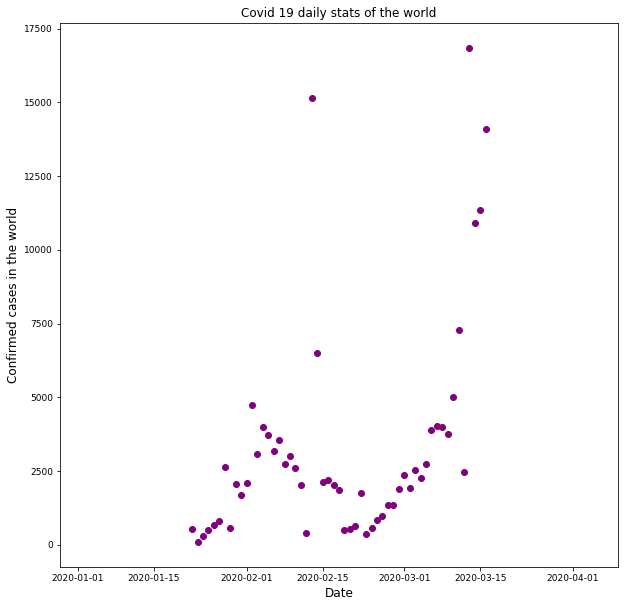

[[1.21430242e-12]]
[[-1917706.15642136]]


In [17]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_World'],color='purple')
ax.set(xlabel="Date",ylabel="Confirmed cases in the world",title="Covid 19 daily stats of the world")
plt.show()

x1=np.c_[covid_19_daily_stats[3].index.values]
y1=np.c_[covid_19_daily_stats[3]['Confirmed_World']]
# Select a linear model
model=sklearn.linear_model.LinearRegression()
# Train the model
model.fit(x1,y1)
print(model.coef_)

x1_b = [[100]]
print(model.predict(x1_b)) 

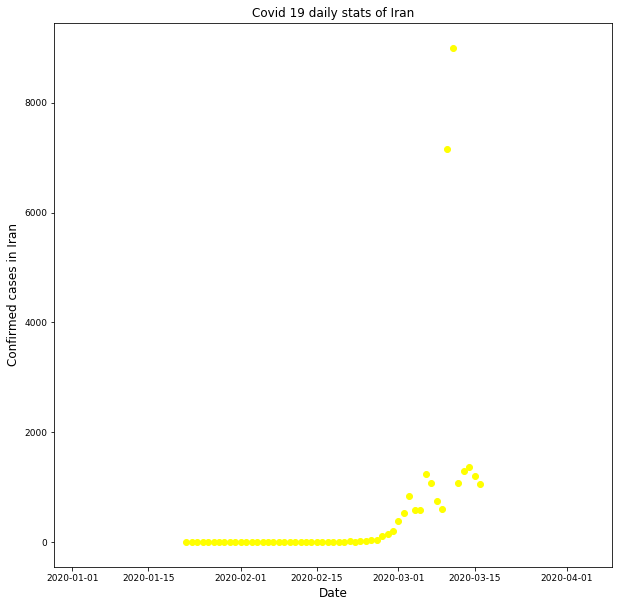

[[5.10435873e-13]]
[[-806968.42092352]]


In [18]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_Iran'],color='yellow')
ax.set(xlabel="Date",ylabel="Confirmed cases in Iran",title="Covid 19 daily stats of Iran")
plt.show()

x=np.c_[covid_19_daily_stats[3].index.values]
y=np.c_[covid_19_daily_stats[3]['Confirmed_Iran']]
# Select a linear model
model=sklearn.linear_model.LinearRegression()
# Train the model
model.fit(x,y)
print(model.coef_)

x_b = [[100]]
print(model.predict(x_b)) 

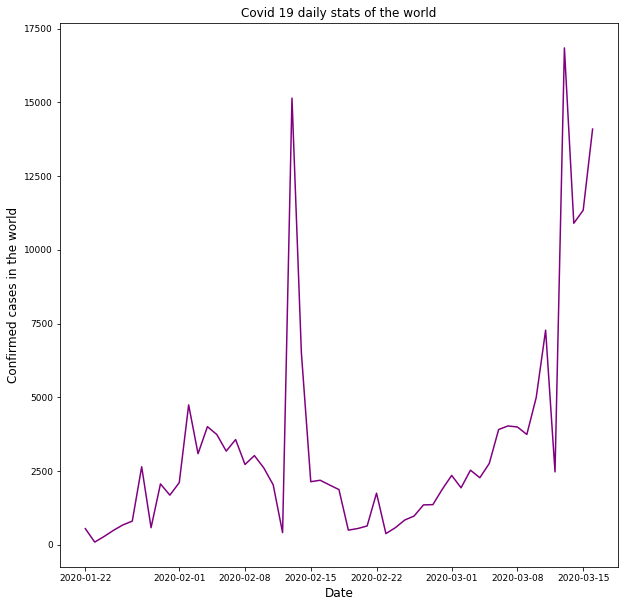

In [19]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_World'],color='purple')
ax.set(xlabel="Date",ylabel="Confirmed cases in the world",title="Covid 19 daily stats of the world")
plt.show()

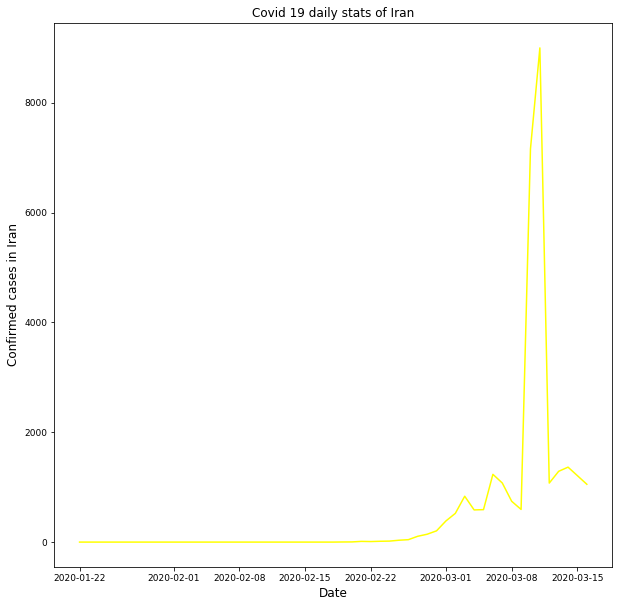

In [20]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_Iran'],color='yellow')
ax.set(xlabel="Date",ylabel="Confirmed cases in Iran",title="Covid 19 daily stats of Iran")
plt.show()

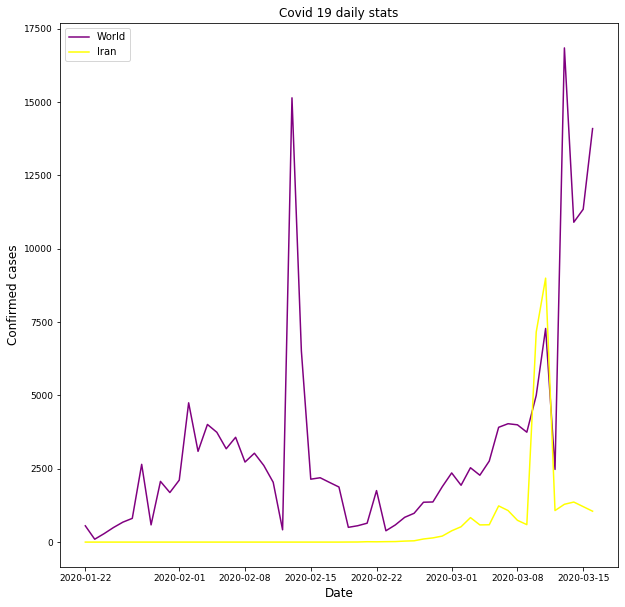

In [21]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_World'],color='purple')
ax.set(xlabel="Date",ylabel="Confirmed cases",title="Covid 19 daily stats")
ax.plot(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_Iran'],color='yellow')
ax.set(xlabel="Date",ylabel="Confirmed cases",title="Covid 19 daily stats")
ax.legend(["World", "Iran"], loc=2)
plt.show()

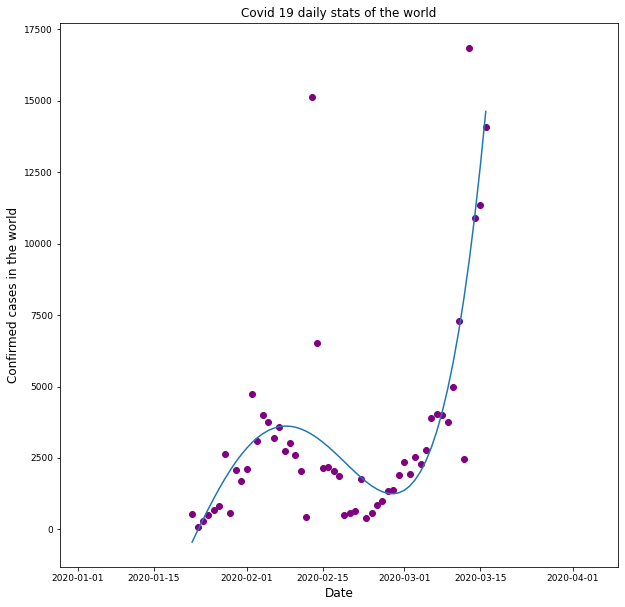

In [22]:
#Model world 's data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_World'],color='purple')
ax.set(xlabel="Date",ylabel="Confirmed cases in the world",title="Covid 19 daily stats of the world")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline
poly=preprocessing.PolynomialFeatures(degree=4, include_bias=False)
scaler=preprocessing.StandardScaler()
lin_reg2=linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(x1, y1)
curve = pipeline_reg.predict(x1)
plt.plot(x1, curve)
plt.show()

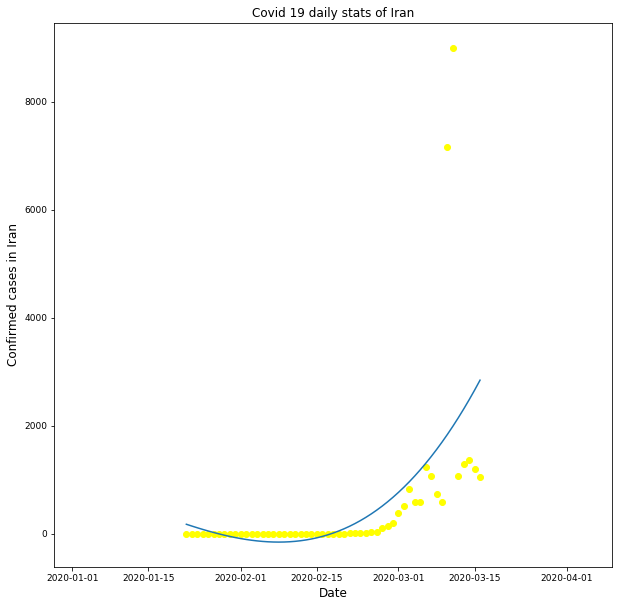

In [23]:
#Model Iran 's data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats[3].index.values,covid_19_daily_stats[3]['Confirmed_Iran'],color='yellow')
ax.set(xlabel="Date",ylabel="Confirmed cases in Iran",title="Covid 19 daily stats of Iran")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline
poly=preprocessing.PolynomialFeatures(degree=3, include_bias=False)
scaler=preprocessing.StandardScaler()
lin_reg2=linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(x, y)
curve = pipeline_reg.predict(x)
plt.plot(x, curve)
plt.show()

In [24]:
remove_indices=[10,21,38,45,50]
keep_indices=list(set(range(len(covid_19_daily_stats[3].index)))-set(remove_indices))

sample_data=covid_19_daily_stats[3][['Confirmed_World', 'Confirmed_Iran']].iloc[keep_indices]
missing_data=covid_19_daily_stats[3][['Confirmed_World', 'Confirmed_Iran']].iloc[remove_indices]
missing_data

,Confirmed_World,Confirmed_Iran
2020-02-01,2113.0,0
2020-02-12,419.0,0
2020-02-29,1889.0,205
2020-03-07,4036.0,1076
2020-03-12,2478.0,1075


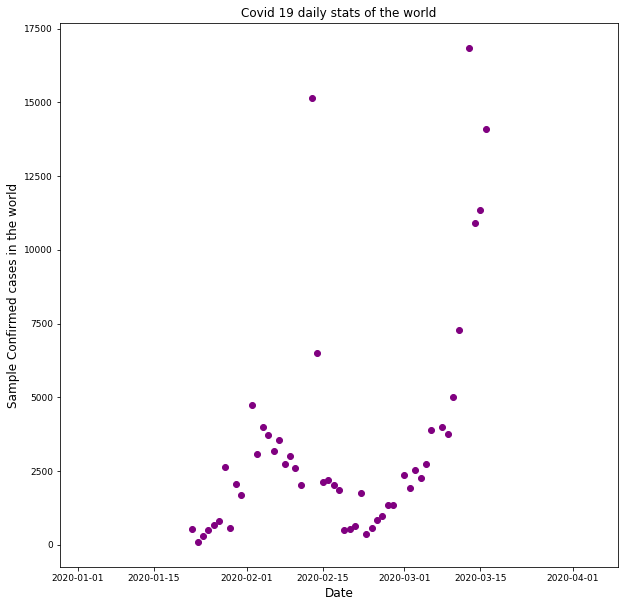

In [25]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(sample_data.index.values,sample_data['Confirmed_World'],color='purple')
ax.set(xlabel="Date",ylabel="Sample Confirmed cases in the world",title="Covid 19 daily stats of the world")

#plt.axis([0, 60000, 0, 10])
X=date
a=4.5/100000
b=4.5
#plt.plot(X, (a*X)+b, "r")
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   54
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -505.598
Method:                       css-mle   S.D. of innovations           2805.283
Date:                Wed, 18 Mar 2020   AIC                           1025.196
Time:                        22:57:48   BIC                           1039.119
Sample:                    01-23-2020   HQIC                          1030.566
                         - 03-16-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        233.9508    174.841      1.338      0.181    -108.732     576.634
ar.L1.D.y     -0.6571      0.136     -4.829      0.000      -0.924      -0.390
ar.L2.D.y     -0.3895      0.163     -2.395      0.0

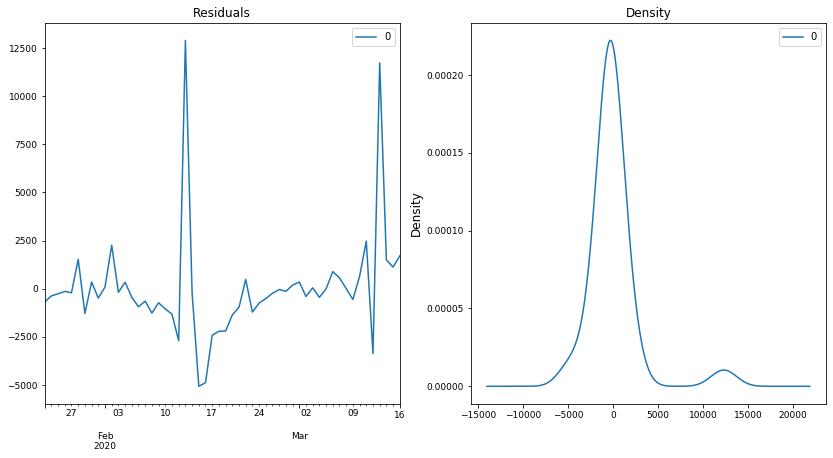

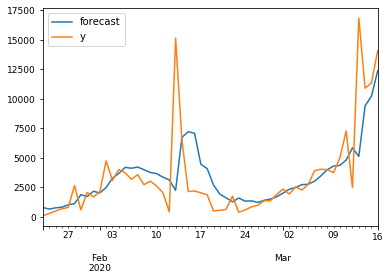

In [26]:
#Model
covid_19_daily_stats[1].to_csv('covid_w.csv')
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
#def parser(x):
    #   return datetime.strptime('%Y-%m')

series=pd.read_csv('covid_w.csv',header=0)
model=ARIMA(covid_19_daily_stats[1],order=(5,1,0))
model_fit=model.fit(desp=0)
print(model_fit.summary())
fig, ax = plt.subplots(1,2,figsize=(14,7))
residuals=DataFrame(model_fit.resid)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
model_fit.plot_predict(dynamic=False)
plt.show()

## Covid 19 Deaths Cases in the world and Iran

In [27]:
#Dataframe containing daily Deaths cases in Iran and the World
covid_19_daily_stats_death[0]

,Deaths,Last Update
World,17.0,01-22-2020
Iran,0.0,01-22-2020
World,1.0,01-23-2020
Iran,0.0,01-23-2020
World,8.0,01-24-2020
...,...,...
Iran,97.0,03-14-2020
World,621.0,03-15-2020
Iran,113.0,03-15-2020
World,686.0,03-16-2020


In [28]:
#Time Series containing daily Deaths cases in the World
covid_19_daily_stats_death[1]

2020-01-22     17.0
2020-01-23      1.0
2020-01-24      8.0
2020-01-25     16.0
2020-01-26     14.0
2020-01-27     26.0
2020-01-28     49.0
2020-01-29      2.0
2020-01-30     38.0
2020-01-31     42.0
2020-02-01     46.0
2020-02-02    103.0
2020-02-03     64.0
2020-02-04     66.0
2020-02-05     72.0
2020-02-06     70.0
2020-02-07     85.0
2020-02-08     87.0
2020-02-09    100.0
2020-02-10    107.0
2020-02-11    100.0
2020-02-12      5.0
2020-02-13    253.0
2020-02-14    152.0
2020-02-15    143.0
2020-02-16    104.0
2020-02-17     98.0
2020-02-18    139.0
2020-02-19    115.0
2020-02-20    125.0
2020-02-21      4.0
2020-02-22    207.0
2020-02-23     11.0
2020-02-24    160.0
2020-02-25     79.0
2020-02-26     62.0
2020-02-27     44.0
2020-02-28     58.0
2020-02-29     69.0
2020-03-01     55.0
2020-03-02     89.0
2020-03-03     75.0
2020-03-04     94.0
2020-03-05     94.0
2020-03-06    112.0
2020-03-07     98.0
2020-03-08    245.0
2020-03-09    193.0
2020-03-10    266.0
2020-03-11    353.0


In [29]:
#Time Series containing daily Deaths cases in Iran
covid_19_daily_stats_death[2]

2020-01-22      0
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      2
2020-02-20      0
2020-02-21      2
2020-02-22      1
2020-02-23      3
2020-02-24      4
2020-02-25      4
2020-02-26      3
2020-02-27      7
2020-02-28      8
2020-02-29      9
2020-03-01     11
2020-03-02     12
2020-03-03     11
2020-03-04     15
2020-03-05     15
2020-03-06     17
2020-03-07     21
2020-03-08     49
2020-03-09     43
2020-03-10    237
2020-03-11    354
2020-03-12     75
2020-03-13     85
2020-03-14     97
2020-03-15    113
2020-03-16    129
Freq: D, d

In [30]:
covid_19_daily_stats_death[3]

,Deaths_World,Deaths_Iran
2020-01-22,17.0,0
2020-01-23,1.0,0
2020-01-24,8.0,0
2020-01-25,16.0,0
2020-01-26,14.0,0
2020-01-27,26.0,0
2020-01-28,49.0,0
2020-01-29,2.0,0
2020-01-30,38.0,0
2020-01-31,42.0,0


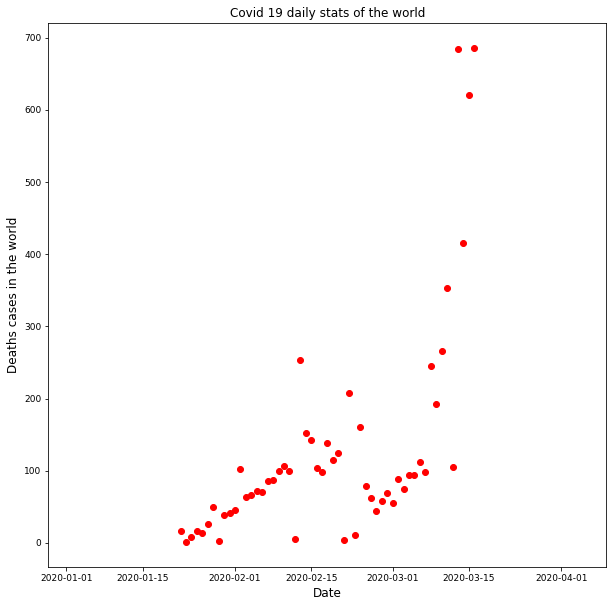

[[6.90561368e-14]]
[[-109116.13982684]]


In [31]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_World'],color='red')
ax.set(xlabel="Date",ylabel="Deaths cases in the world",title="Covid 19 daily stats of the world")
plt.show()

x2=np.c_[covid_19_daily_stats_death[3].index.values]
y2=np.c_[covid_19_daily_stats_death[3]['Deaths_World']]
# Select a linear model
model=sklearn.linear_model.LinearRegression()
# Train the model
model.fit(x2,y2)
print(model.coef_)

x2_b = [[100]]
print(model.predict(x2_b)) 

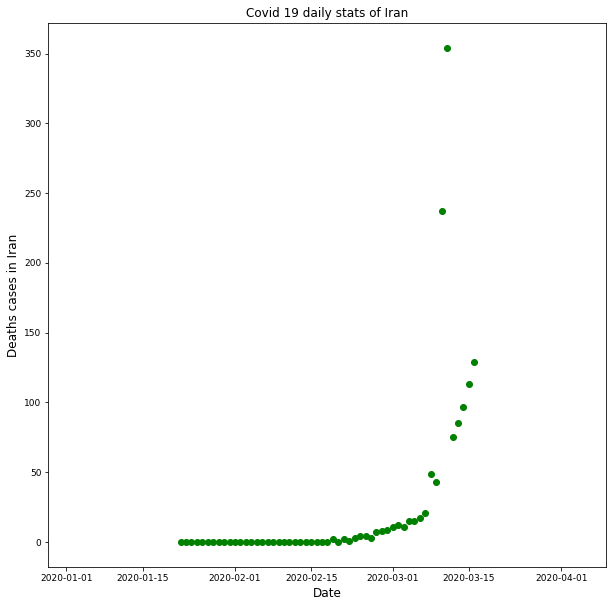

[[2.42888541e-14]]
[[-38400.45137085]]


In [32]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_Iran'],color='green')
ax.set(xlabel="Date",ylabel="Deaths cases in Iran",title="Covid 19 daily stats of Iran")
plt.show()

xx=np.c_[covid_19_daily_stats_death[3].index.values]
yy=np.c_[covid_19_daily_stats_death[3]['Deaths_Iran']]
# Select a linear model
model=sklearn.linear_model.LinearRegression()
# Train the model
model.fit(xx,yy)
print(model.coef_)

xx_b = [[100]]
print(model.predict(xx_b)) 

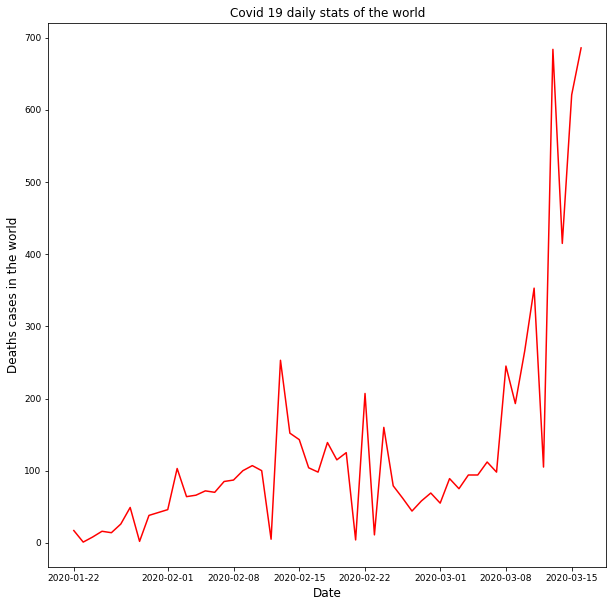

In [33]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_World'],color='red')
ax.set(xlabel="Date",ylabel="Deaths cases in the world",title="Covid 19 daily stats of the world")
plt.show()

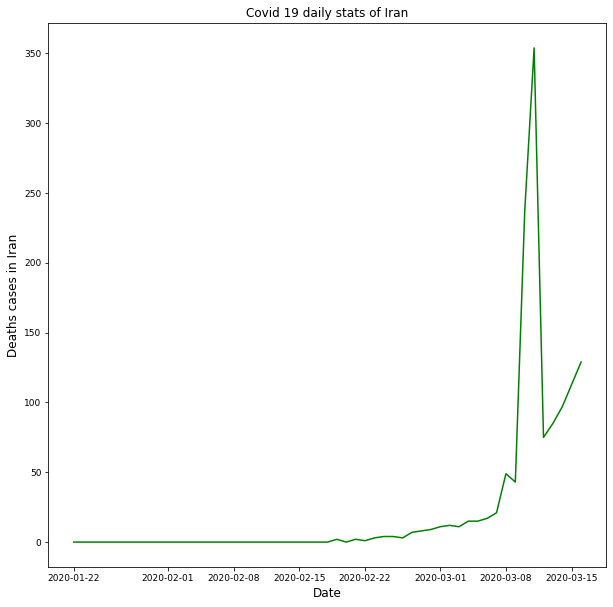

In [34]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_Iran'],color='green')
ax.set(xlabel="Date",ylabel="Deaths cases in Iran",title="Covid 19 daily stats of Iran")
plt.show()

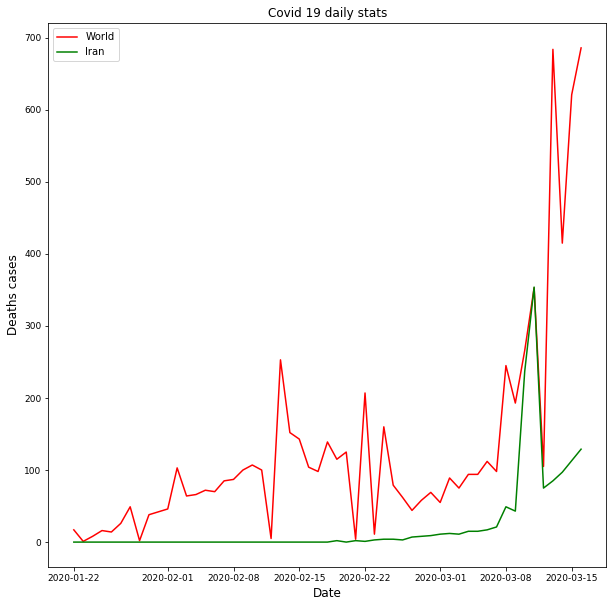

In [35]:
# Visualize the data
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_World'],color='red')
ax.set(xlabel="Date",ylabel="Deaths cases",title="Covid 19 daily stats")
ax.plot(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_Iran'],color='green')
ax.set(xlabel="Date",ylabel="Deaths cases",title="Covid 19 daily stats")
ax.legend(["World", "Iran"], loc=2)
plt.show()

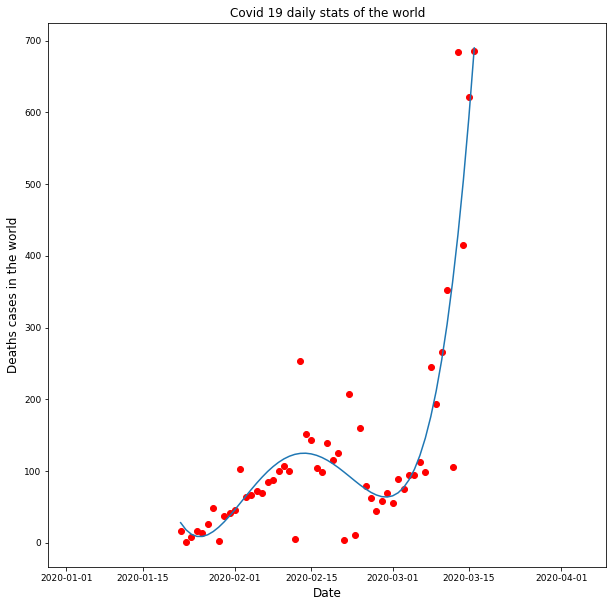

In [36]:
#Model world 's data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_World'],color='red')
ax.set(xlabel="Date",ylabel="Deaths cases in the world",title="Covid 19 daily stats of the world")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline
poly=preprocessing.PolynomialFeatures(degree=4, include_bias=False)
scaler=preprocessing.StandardScaler()
lin_reg2=linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(x2, y2)
curve = pipeline_reg.predict(x2)
plt.plot(x2, curve)
plt.show()

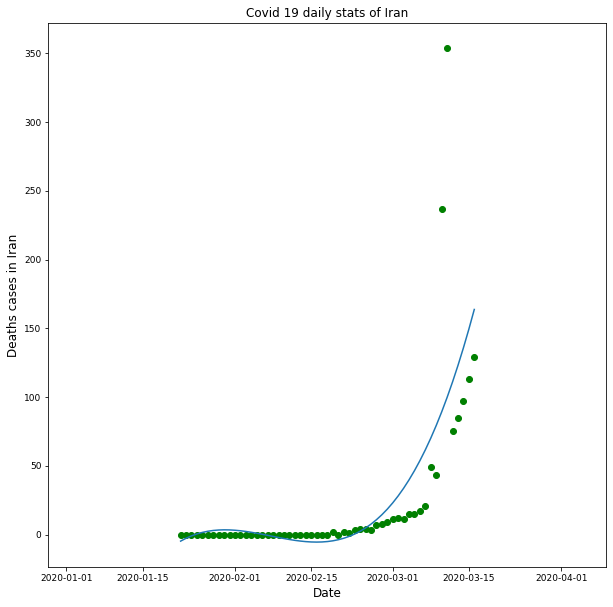

In [37]:
#Model Iran 's data
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(covid_19_daily_stats_death[3].index.values,covid_19_daily_stats_death[3]['Deaths_Iran'],color='green')
ax.set(xlabel="Date",ylabel="Deaths cases in Iran",title="Covid 19 daily stats of Iran")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline
poly=preprocessing.PolynomialFeatures(degree=3, include_bias=False)
scaler=preprocessing.StandardScaler()
lin_reg2=linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(xx, yy)
curve = pipeline_reg.predict(xx)
plt.plot(xx, curve)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   54
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -311.171
Method:                       css-mle   S.D. of innovations             75.828
Date:                Wed, 18 Mar 2020   AIC                            636.342
Time:                        22:57:52   BIC                            650.265
Sample:                    01-23-2020   HQIC                           641.712
                         - 03-16-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5421     10.667      1.363      0.173      -6.364      35.448
ar.L1.D.y     -0.8387      0.131     -6.394      0.000      -1.096      -0.582
ar.L2.D.y     -0.0392      0.171     -0.229      0.8

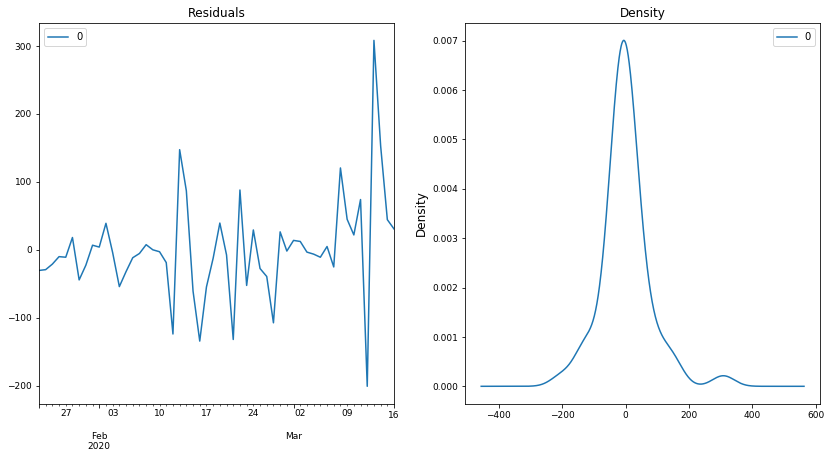

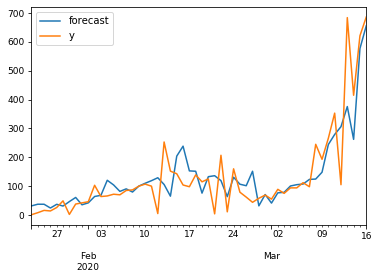

In [38]:
#Model
covid_19_daily_stats_death[1].to_csv('covid_w.csv')
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

series=pd.read_csv('covid_w.csv',header=0)
model=ARIMA(covid_19_daily_stats_death[1],order=(5,1,0))
model_fit=model.fit(desp=0)
print(model_fit.summary())
fig, ax = plt.subplots(1,2,figsize=(14,7))
residuals=DataFrame(model_fit.resid)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
model_fit.plot_predict(dynamic=False)
plt.show()

### I am still working...